In [8]:
#Code adapted from https://github.com/mogwai/fastai_audio/blob/master/tutorials/01_Intro_to_Audio.ipynb
data_url = 'http://www.openslr.org/resources/45/ST-AEDS-20180100_1-OS'
from utils import *

In [10]:
data_folder = untar_data(data_url)
if not os.path.exists(data_folder): untar_data(data_url, dest=data_folder)

In [27]:
from IPython.display import Audio
audio_files = data_folder.ls()
example = audio_files[1]
Audio(str(example))

In [28]:
import librosa
y, sr = librosa.load(example, sr=None)

In [29]:
print("Sample rate  :", sr)
print("Signal Length:", len(y))
print("Duration     :", len(y)/sr, "seconds")

Sample rate  : 16000
Signal Length: 85120
Duration     : 5.32 seconds


In [30]:
print("Type  :", type(y))
print("Signal: ", y)
print("Shape :", y.shape)

Type  : <class 'numpy.ndarray'>
Signal:  [ 0.          0.          0.         ... -0.00018311 -0.00042725 -0.0007019 ]
Shape : (85120,)


In [31]:
Audio(y, rate=sr)   #sample rate 16 000 Hz (frequency)

In [32]:
Audio(y, rate=sr/2)  #sample rate 8 000 Hz

In [34]:
Audio(y, rate=sr*2)  #sample rate 32 000 Hz

In [35]:
y_new, sr_new = librosa.load(example, sr=sr*2)
Audio(y_new, rate=sr_new)

In [36]:
y_new, sr_new = librosa.load(example, sr=sr/2)
Audio(y_new, rate=sr_new)

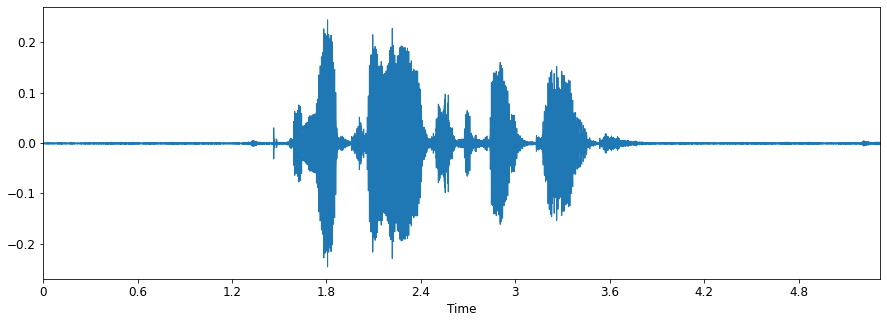

In [37]:
import librosa.display
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr=sr)

In [38]:
# Adapted from https://musicinformationretrieval.com/audio_representation.html
# An amazing open-source resource, especially if music is your sub-domain.
def make_tone(freq, clip_length=1, sr=16000):
    t = np.linspace(0, clip_length, int(clip_length*sr), endpoint=False)
    return 0.1*np.sin(2*np.pi*freq*t)
clip_500hz = make_tone(500)
clip_5000hz = make_tone(5000)

In [39]:
Audio(clip_500hz, rate=sr)

In [40]:
Audio(clip_5000hz, rate=sr)

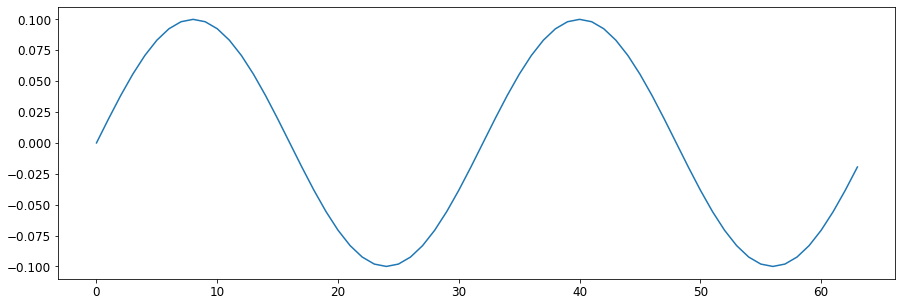

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(clip_500hz[0:64])

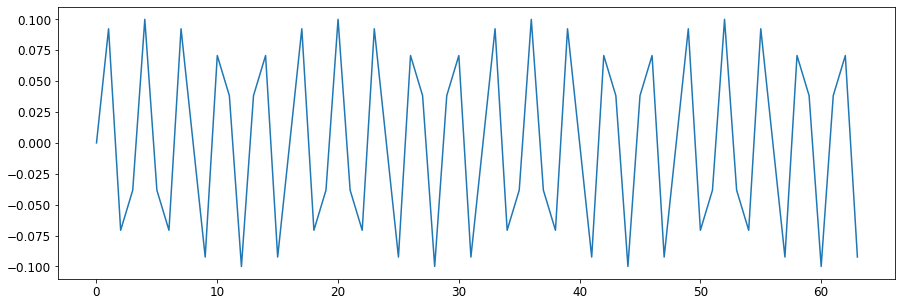

In [43]:
plt.figure(figsize=(15, 5))
plt.plot(clip_5000hz[0:64])

In [44]:
clip_500_to_1000 = np.concatenate([make_tone(500), make_tone(1000)])
clip_5000_to_5500 = np.concatenate([make_tone(5000), make_tone(5500)])

In [45]:
# first half of the clip is 500hz, 2nd is 1000hz
Audio(clip_500_to_1000, rate=sr)

In [46]:
# first half of the clip is 5000hz, 2nd is 5500hz
Audio(clip_5000_to_5500, rate=sr)

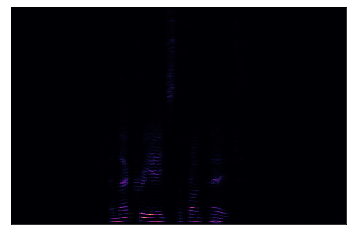

In [49]:
sg0 = librosa.stft(y)
sg_mag, sg_phase = librosa.magphase(sg0)
display(librosa.display.specshow(sg_mag))

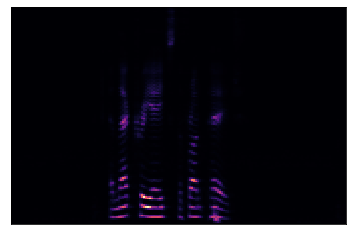

In [50]:
sg1 = librosa.feature.melspectrogram(S=sg_mag, sr=sr)
display(librosa.display.specshow(sg1))

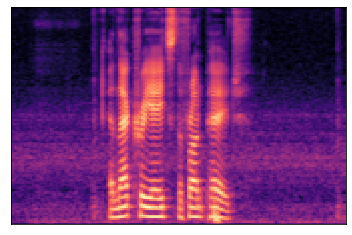

In [51]:
sg2 = librosa.amplitude_to_db(sg1, ref=np.min)
librosa.display.specshow(sg2)

Text(0.5, 1.0, 'Mel spectrogram')

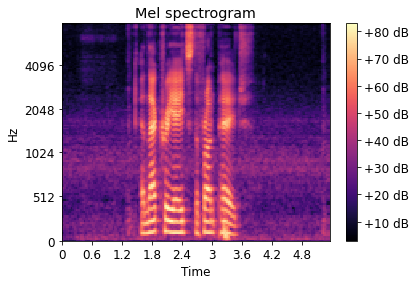

In [52]:
# code adapted from the librosa.feature.melspectrogram documentation
librosa.display.specshow(sg2, sr=16000, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')

In [53]:
sg2.min(), sg2.max(), sg2.mean()

(2.9620743, 82.962074, 28.128046)

In [54]:
print(type(sg2))
sg2.shape

<class 'numpy.ndarray'>


(128, 167)

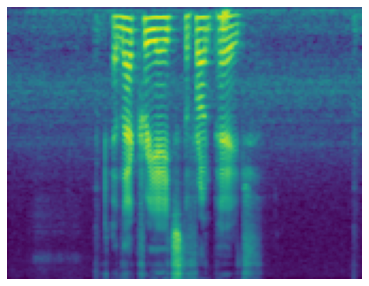

In [63]:
show_image(torch.from_numpy(sg2).unsqueeze(0), figsize=(15, 5), cmap=None)

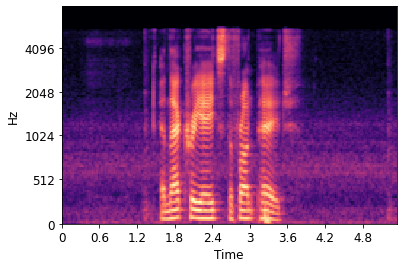

In [70]:
y, sr = librosa.load(example)
display(Audio(y, rate=sr))
sg = librosa.feature.melspectrogram(y, sr=16000,  n_fft=2048, hop_length=512, power=1.0, n_mels=128, fmin=0.0, fmax=None)
db_spec = librosa.amplitude_to_db(sg, ref=1.0, amin=1e-05, top_db=80.0)
librosa.display.specshow(db_spec, y_axis='mel', fmax=8000, x_axis='time')

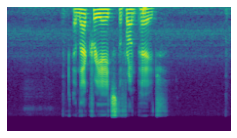

In [73]:
show_image(torch.from_numpy(db_spec).unsqueeze(0))

In [74]:
# Adapted from https://musicinformationretrieval.com/audio_representation.html
# An amazing open-source resource, especially if music is your sub-domain.
def make_tone(freq, clip_length=1, sr=16000):
    t = np.linspace(0, clip_length, int(clip_length*sr), endpoint=False)
    return 0.1*np.sin(2*np.pi*freq*t)

In [75]:
def add_3_random_tones(clip_length=1, sr=16000):
    tone_list = []
    for i in range(3):
        frequency = random.randint(500,8000)
        tone_list.append(make_tone(frequency, clip_length, sr))
        print(f"Frequency {i+1}: {frequency}")
    return sum(tone_list)

In [81]:
sr = 16000
signal = add_3_random_tones(sr=sr)
signal

Frequency 1: 1339
Frequency 2: 6043
Frequency 3: 6567


array([ 0.        ,  0.1730496 , -0.10336602, ..., -0.27350973,  0.10336602, -0.1730496 ])

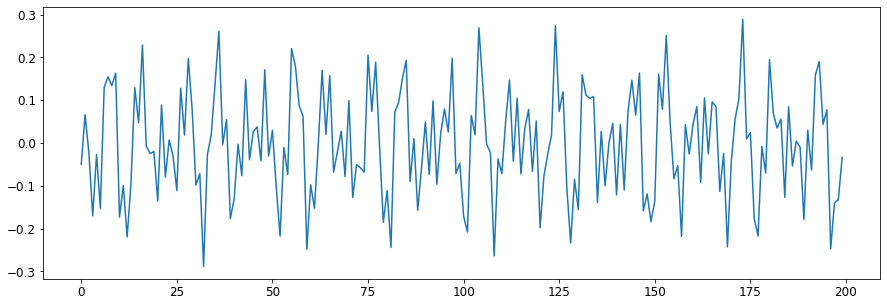

In [80]:
display(Audio(signal, rate=sr))
plt.figure(figsize=(15, 5))
plt.plot(signal[200:400])

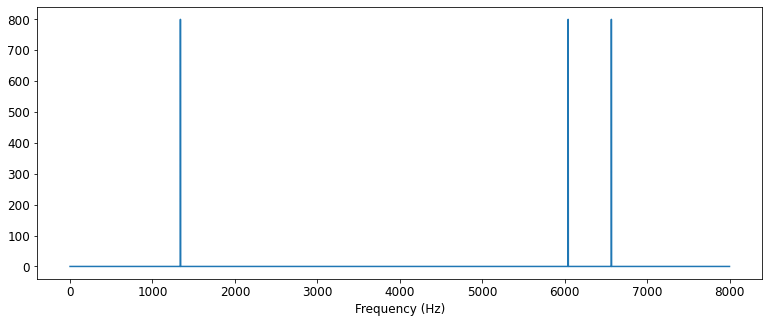

In [82]:
# Code adapted from https://musicinformationretrieval.com/fourier_transform.html and the original
# implementation of fastai audio by John Hartquist at https://github.com/sevenfx/fastai_audio/
def fft_and_display(signal, sr):
    ft = scipy.fftpack.fft(signal, n=len(signal))
    ft = ft[:len(signal)//2+1]
    ft_mag = np.absolute(ft)
    f = np.linspace(0, sr/2, len(ft_mag)) # frequency variable
    plt.figure(figsize=(13, 5))
    plt.plot(f, ft_mag) # magnitude spectrum
    plt.xlabel('Frequency (Hz)')
    
fft_and_display(signal, sr)

In [83]:
for i in range(5):
    signal += add_3_random_tones(sr=sr)

Frequency 1: 7808
Frequency 2: 4967
Frequency 3: 1212
Frequency 1: 5337
Frequency 2: 3956
Frequency 3: 760
Frequency 1: 744
Frequency 2: 1267
Frequency 3: 2291
Frequency 1: 2405
Frequency 2: 4639
Frequency 3: 5431
Frequency 1: 717
Frequency 2: 5097
Frequency 3: 2128


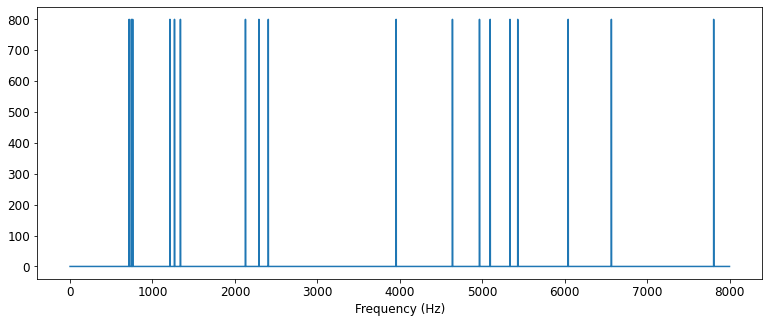

In [84]:
fft_and_display(signal, sr)

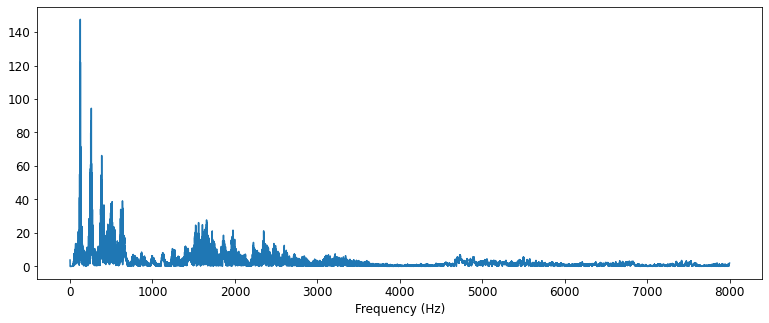

In [85]:
y, sr = librosa.load(example, sr=16000)
fft_and_display(y, sr)

In [86]:
s1 = add_3_random_tones(sr=sr)
s2 = add_3_random_tones(sr=sr)
s1_plus_s2 = np.add(s1, s2)
s1_then_s2 = np.concatenate([s1, s2])
display(Audio(s1_plus_s2, rate=sr))
display(Audio(s1_then_s2, rate=sr))

Frequency 1: 6365
Frequency 2: 5823
Frequency 3: 6245
Frequency 1: 4964
Frequency 2: 3936
Frequency 3: 2305


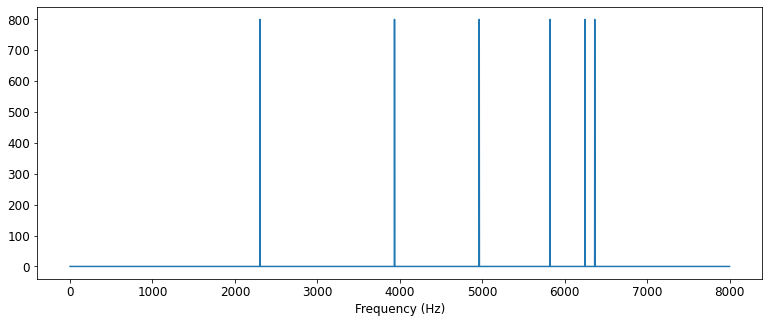

In [87]:
fft_and_display(s1_plus_s2, sr)

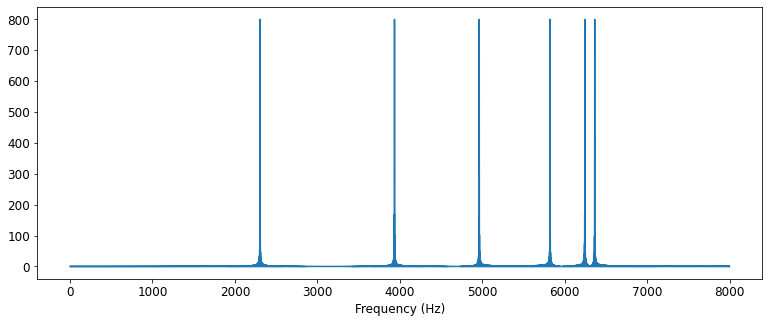

In [88]:
fft_and_display(s1_then_s2, sr)

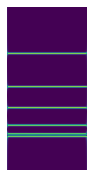

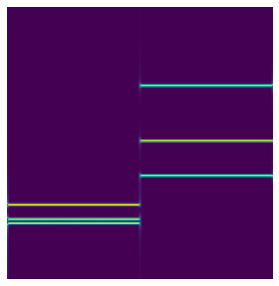

In [90]:
def stft_and_display(signal, n_fft=512, hop_length=128, to_db_scale=False, n_mels=128, mel_scale=False, 
                     top_db=80, show_shape=False):
    stft = librosa.stft(signal, n_fft, hop_length)
    real_portion = abs(stft)
    if(mel_scale):   real_portion = librosa.feature.melspectrogram(S=real_portion, n_fft=n_fft, n_mels=n_mels)
    if(to_db_scale): real_portion = librosa.amplitude_to_db(real_portion, top_db)
    if(show_shape):  print("Shape: {}x{}".format(*real_portion.shape))
    display(show_image(torch.from_numpy(real_portion).unsqueeze(0)))
display(Audio(s1_plus_s2, rate=sr))    
stft_and_display(s1_plus_s2)
display(Audio(s1_then_s2, rate=sr))    
stft_and_display(s1_then_s2)

n_fft = 100


n_fft = 600


n_fft = 1100


n_fft = 1600


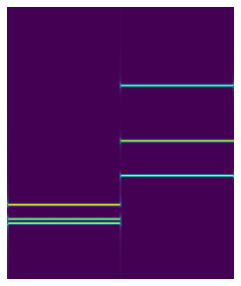

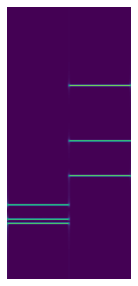

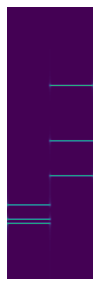

In [93]:
for n_fft in range(100, 2100, 500):
    print("n_fft =", n_fft)
    stft_and_display(s1_then_s2, n_fft=n_fft)

n_fft = 50


n_fft = 250


n_fft = 450


n_fft = 650


n_fft = 850


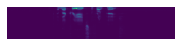

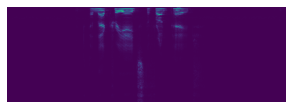

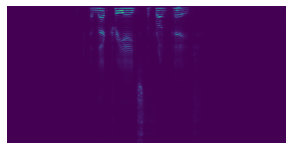

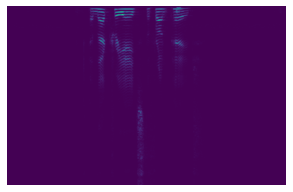

In [94]:
y, sr = librosa.load(example, sr=16000)
for n_fft in range(50, 1050, 200):
    print("n_fft =", n_fft)
    stft_and_display(y, n_fft=n_fft)

n_fft = 50


/opt/conda/lib/python3.7/site-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


n_fft = 250


n_fft = 450


n_fft = 650


n_fft = 850


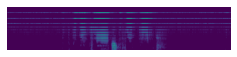

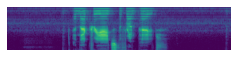

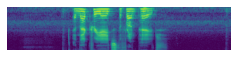

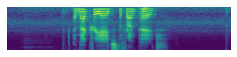

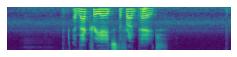

In [95]:
for n_fft in range(50, 1050, 200):
    print("n_fft =", n_fft)
    stft_and_display(y, n_fft=n_fft, mel_scale=True, to_db_scale=True)

hop_length = 50


hop_length = 150


hop_length = 250


hop_length = 350


hop_length = 450


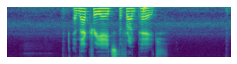

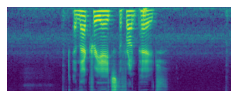

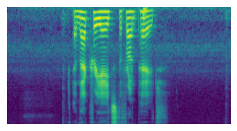

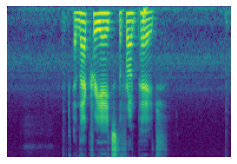

In [96]:
for hop_length in range(50, 550, 100):
    print("hop_length =", hop_length )
    stft_and_display(y, n_fft=850, hop_length=hop_length, mel_scale=True, to_db_scale=True)

Sig length   : 85120
hop_length   : 100
SigLen/HopLen: 851.2
Floor + 1    : 852
Shape: 128x852


Sig length   : 85120
hop_length   : 200
SigLen/HopLen: 425.6
Floor + 1    : 426
Shape: 128x426


Sig length   : 85120
hop_length   : 300
SigLen/HopLen: 283.73333333333335
Floor + 1    : 284
Shape: 128x284


Sig length   : 85120
hop_length   : 400
SigLen/HopLen: 212.8
Floor + 1    : 213
Shape: 128x213


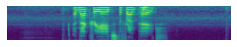

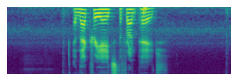

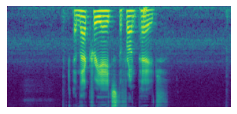

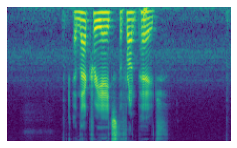

In [97]:
for hop_length in range(100, 500, 100):
    print("Sig length   :", len(y))
    print("hop_length   :", hop_length)
    print("SigLen/HopLen:", len(y)/hop_length)
    print("Floor + 1    :", int(len(y)/hop_length)+1)
    stft_and_display(y, n_fft=850, hop_length=hop_length, mel_scale=True, to_db_scale=True, show_shape=True)

n_mels = 50
Shape: 50x333


n_mels = 300
Shape: 300x333


n_mels = 550
Shape: 550x333


n_mels = 800
Shape: 800x333


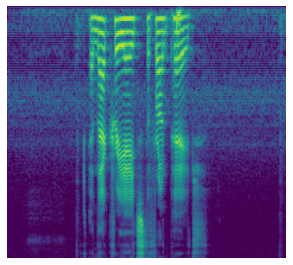

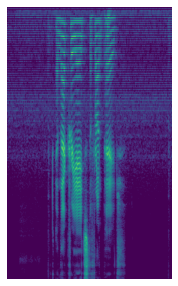

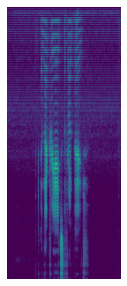

In [98]:
for n_mels in range(50, 1050, 250):
    print("n_mels =", n_mels)
    stft_and_display(y, n_fft=1024, hop_length=256, n_mels=n_mels, mel_scale=True, to_db_scale=True, show_shape=True)

n_mels = 50
Shape: 50x333


n_mels = 300
Shape: 300x333


n_mels = 550
Shape: 550x333


n_mels = 800
Shape: 800x333


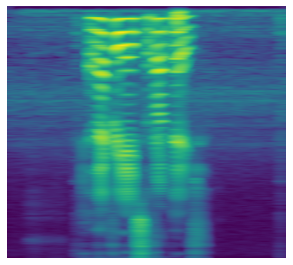

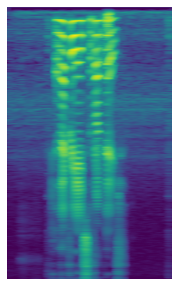

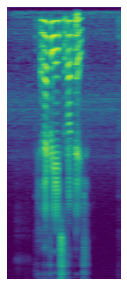

In [99]:
for n_mels in range(50, 1050, 250):
    print("n_mels =", n_mels)
    stft_and_display(y, n_fft=8192, hop_length=256, n_mels=n_mels, mel_scale=True, to_db_scale=True, show_shape=True)